In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import datetime as dt
import seaborn as sns
sns.set()

In [6]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine,reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [10]:
# Start a session
session = Session(engine)

Precipitation Analysis

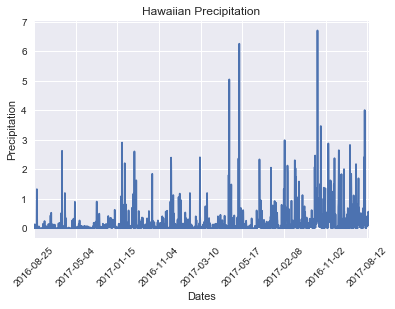

In [60]:
# Query the last 12 months of precipitation data
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>dt.date(2016,8,24)).all()
# Load the results into a Pandas DataFrame
prcp_df = pd.DataFrame(results)
prcp_df.set_index('date', inplace=True)
prcp_df.plot(rot=45,legend=False)
plt.xlabel('Dates')
plt.ylabel('Precipitation')
plt.title('Hawaiian Precipitation')
plt.show()

In [41]:
# Print the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [43]:
# Design a query to calculate the total number of stations
session.query(Station.station).group_by(Station.station).count()

9

In [48]:
# Design a query to find the most active stations
result = session.query(Measurement.station,Station.station,Station.name,func.count(Measurement.prcp)).filter(Measurement.station==Station.station).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
result

[('USC00519281', 'USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830',
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  1937),
 ('USC00511918', 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

The station with the highest number of observations is Waihee station.

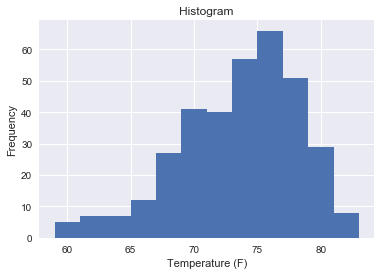

In [62]:
result = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281',Measurement.date>dt.date(2016,8,24)).all()
df = pd.DataFrame(result)
plt.hist(df['tobs'],bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

Temperature Analysis

In [70]:
def calc_temps(start_date, end_date):
    #Get the parts of the start and end dates
    start_parts = start_date.split("-")
    start_parts[0] = str(int(start_parts[0])-1)
    end_parts = end_date.split("-")
    end_parts[0] = str(int(end_parts[0])-1)
    resultt = session.query(Measurement.tobs).filter(Measurement.date>=dt.date(int(start_parts[0]),int(start_parts[1]),int(start_parts[2])),Measurement.date<=dt.date(int(end_parts[0]),int(end_parts[1]),int(end_parts[2]))).all()
    result_list = [x for (x,) in resultt]
    min_temp = min(result_list)
    max_temp = max(result_list)
    mean_temp = np.mean(result_list)
    print("The minimum temperature was", min_temp, ". The maximum temperature was", max_temp, ". The average temperature was", mean_temp, ".")
    return min_temp, max_temp, mean_temp

In [72]:
answer = calc_temps('2018-06-01','2018-06-09')

The minimum temperature was 72.0 . The maximum temperature was 81.0 . The average temperature was 77.7058823529 .


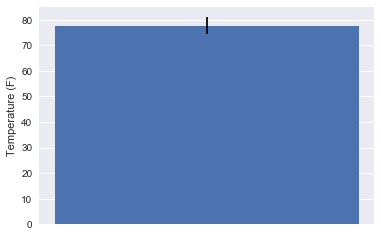

In [75]:
#Plot the min, avg, and max temps as bar chart
plt.bar(1,answer[2], yerr=(answer[1]-answer[2]))
plt.xticks([])
plt.ylabel('Temperature (F)')
plt.show()